In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [7]:
sentence_embeddings = np.load('../data/sentence_embeddings.npy')
data = pd.read_csv('../data/cleaned_data.csv')

In [8]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(sentence_embeddings)

In [9]:
pca_df = pd.DataFrame({
    'x' : reduced_embeddings[:, 0],
    'y' : reduced_embeddings[:, 1],
    'title' : data['movie_title'],
    'genre' : data['genres'] if 'genres' in data.columns else 'Unknown'
})

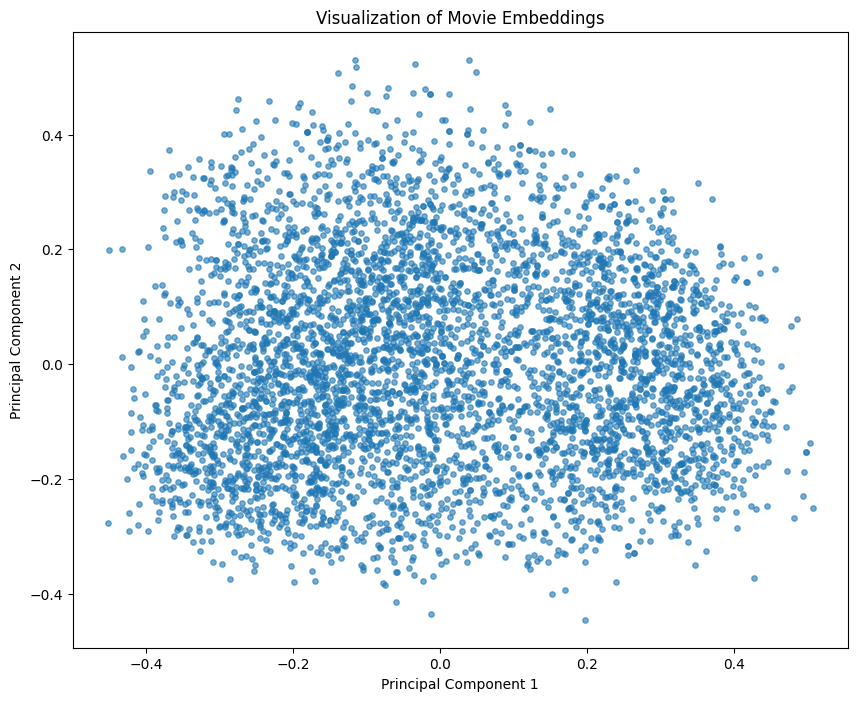

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['x'], pca_df['y'], alpha=0.6, s=15)
plt.title('Visualization of Movie Embeddings')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [11]:
sample_size = min(1000, len(sentence_embeddings))
sample_indices = data.sample(sample_size, random_state=42).index
sample_embeddings = sentence_embeddings[sample_indices]
sample_titles = data.loc[sample_indices, 'movie_title']

In [13]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    max_iter=1000,
    random_state=42,
    verbose=1
    )

tsne_results = tsne.fit_transform(sample_embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 4.720s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.291055
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.083435
[t-SNE] KL divergence after 1000 iterations: 1.664135


In [14]:
tsne_df = pd.DataFrame({
    'x' : tsne_results[:, 0],
    'y' : tsne_results[:, 1],
    'title' : sample_titles.values
})

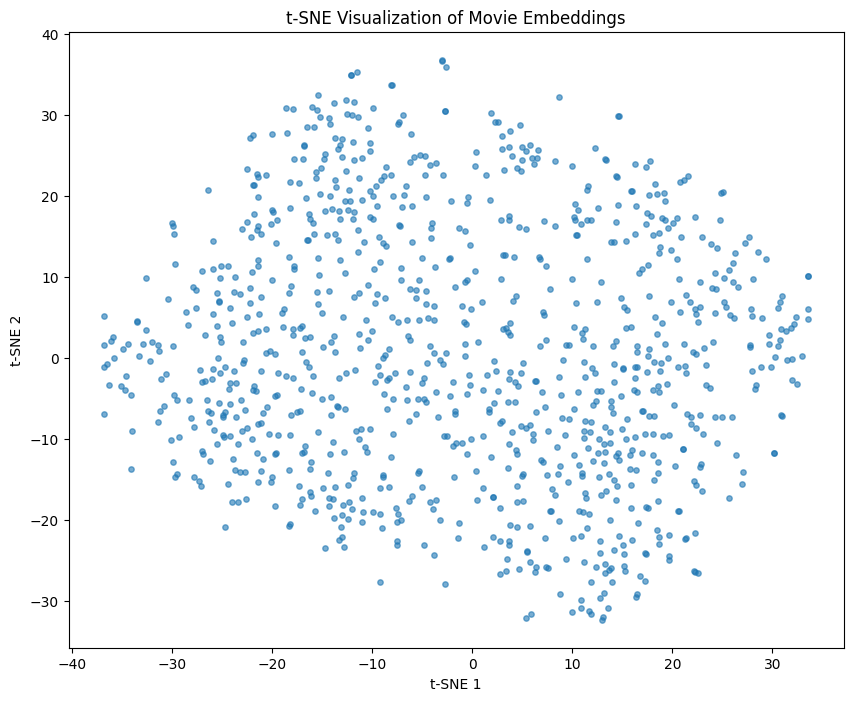

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['x'], tsne_df['y'], alpha=0.6, s=15)
plt.title("t-SNE Visualization of Movie Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()